In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
df.shape

(729322, 11)

In [5]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [6]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


* <b> Continuous variables </b> - pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude , trip_duration
* <b> Categorical variables </b> - vendor_id, passenger_count, store_and_fwd_flag
* <b> datetime variables </b> - pickup_datetime, dropoff_datetime
#### id is not providing any important information, we can ignore it

In [8]:
# Converting datetime variables from 'object' to datetime
import datetime
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)

In [9]:
df['pickup_day_name'] = df.pickup_datetime.apply(lambda x: x.day_name())
df['dropoff_day_name'] = df.dropoff_datetime.apply(lambda x: x.day_name())

In [10]:
df['pickup_month'] = df.pickup_datetime.apply(lambda x: x.month_name())
df['dropoff_month'] = df.dropoff_datetime.apply(lambda x: x.month_name())

In [12]:
df['pickup_day'] = df.pickup_datetime.dt.day
df['dropoff_day'] = df.dropoff_datetime.dt.day

In [13]:
pip install haversine

In [14]:
from haversine import haversine
df['distance_in_km'] = df.apply(lambda x: haversine((x['pickup_latitude'], x['pickup_longitude']), (x['dropoff_latitude'],x['dropoff_longitude'])), axis=1)

In [15]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_name,dropoff_day_name,pickup_month,dropoff_month,pickup_day,dropoff_day,distance_in_km
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,February,February,29,29,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,March,March,11,11,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,February,February,21,21,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,January,January,5,5,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,February,February,17,17,4.328540


In [16]:
df.shape

(729322, 18)

## Univariate Analysis

In [17]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
pickup_day_name               object
dropoff_day_name              object
pickup_month                  object
dropoff_month                 object
pickup_day                     int64
dropoff_day                    int64
distance_in_km               float64
dtype: object

In [18]:
df['vendor_id'] = df['vendor_id'].astype('object')

In [19]:
df.select_dtypes(include=['int64','float64','Int64']).dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
pickup_day             int64
dropoff_day            int64
distance_in_km       float64
dtype: object

In [20]:
df.select_dtypes(include=['category','object']).dtypes

id                    object
vendor_id             object
store_and_fwd_flag    object
pickup_day_name       object
dropoff_day_name      object
pickup_month          object
dropoff_month         object
dtype: object

### Variable - vendor_id

In [21]:
df['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [22]:
df['vendor_id'].describe()

count     729322
unique         2
top            2
freq      390481
Name: vendor_id, dtype: int64

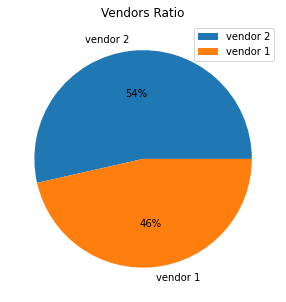

In [23]:
plt.figure(figsize=(5,5))
labels = ['vendor 2','vendor 1']
plt.pie(df['vendor_id'].value_counts(),labels=labels, autopct = '%0.0f%%')
plt.legend()
plt.title('Vendors Ratio')
plt.show()

* **There are only 2 vendors for taxis in NYC dataset - vendor 2 and vendor 1**
* **No siginficant difference between the number of taxis associated with each vendor**

### Variable - passenger_count

In [24]:
df['passenger_count'].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

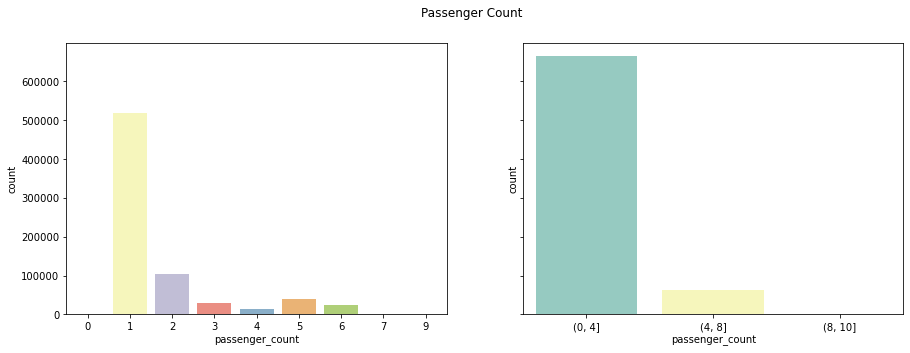

In [25]:
fig, axes = plt.subplots(1, 2,figsize=(15,5),sharey=True)
fig.suptitle('Passenger Count')
sns.countplot(ax=axes[0], data=df, x=df['passenger_count'],palette="Set3")
sns.countplot(ax=axes[1], data=df, x=pd.cut(df['passenger_count'],[0,4,8,10]), palette="Set3")
plt.show()


* **Single passenger has boarded taxi most number of times**
* **Some trips are also having 0 passengers, this could be possible as the ride started and got cancelled or driver might have missed to update the passenger count in application**
* **Most trips are in 0-4 passenger category which belongs to the traditional cabs**

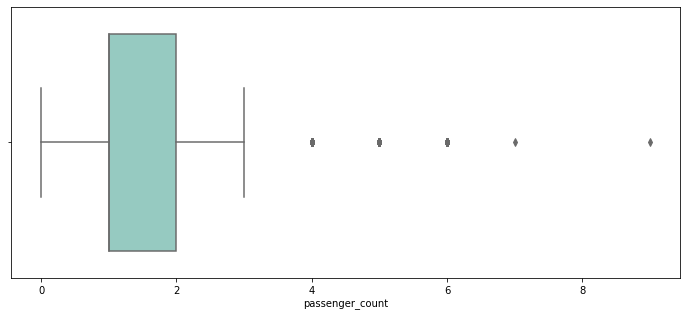

In [26]:
plt.figure(figsize = (12,5))
sns.boxplot(data=df, x=df.passenger_count, palette="Set3")
plt.show()

* **Average passenger count lies between 1-2**
* **Passengers greater than four are considered as outliers**

### Variable - pickup_day_name and dropoff_day_name

In [27]:
df['pickup_day_name'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day_name, dtype: int64

In [28]:
weekend = ['Sunday','Saturday']
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday']
df['day_type'] = df['pickup_day_name'].apply(lambda x:'weekend' if x in weekend else 'week day')


In [29]:
df['day_type_dropoff'] = df['dropoff_day_name'].apply(lambda x:'weekend' if x in weekend else 'week day')

In [30]:
df['day_type'].value_counts()

week day    521388
weekend     207934
Name: day_type, dtype: int64

In [31]:
df['day_type_dropoff'].value_counts()

week day    520472
weekend     208850
Name: day_type_dropoff, dtype: int64

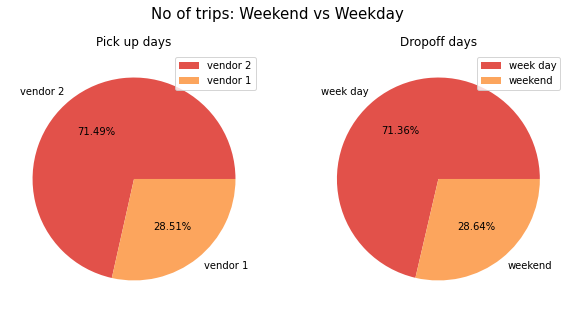

In [32]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('No of trips: Weekend vs Weekday',fontsize=15)

palette_color = sns.color_palette('Spectral')
ax[0].pie(x=df['day_type'].value_counts(),labels=labels, colors=palette_color,autopct ='%0.02f%%')
labels = ['week day','weekend']
ax[0].title.set_text('Pick up days')
ax[0].legend()

ax[1].pie(x=df['day_type_dropoff'].value_counts(),labels=labels,colors=palette_color,autopct = '%0.2f%%')
labels = ['week day','weekend']
ax[1].legend()
ax[1].title.set_text('Dropoff days')
plt.show()

* **Most trips are in week days, this is probably because people go to their work locations in week day and prefer to stay at home on weekends**
* **there is a minor difference between pickup and dropoff days, this could be because of few long trips**

### Variable - pickup_month and dropoff_month

In [33]:
df['pickup_month'].value_counts()

March       128316
April       125634
May         124201
February    119364
June        117406
January     114401
Name: pickup_month, dtype: int64

In [34]:
df['dropoff_month'].value_counts()

March       128284
April       125633
May         124236
February    119361
June        117380
January     114375
July            53
Name: dropoff_month, dtype: int64

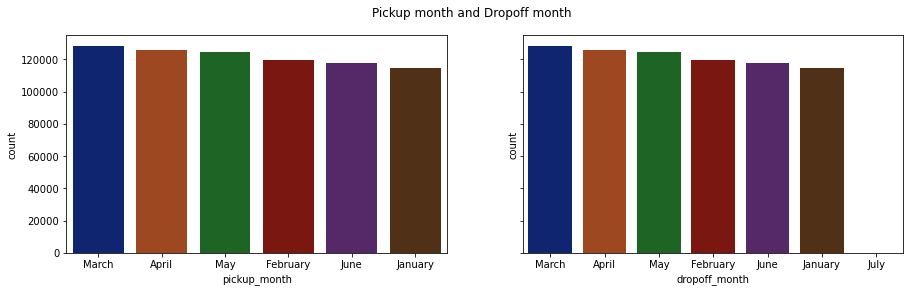

In [35]:
fig, axes = plt.subplots(1, 2,figsize=(15,4),sharey=True)
fig.suptitle('Pickup month and Dropoff month')
sns.countplot(ax=axes[0], data=df, x=df['pickup_month'], order=df['pickup_month'].value_counts().index,palette="dark")
sns.countplot(ax=axes[1], data=df, x=df['dropoff_month'],order=df['dropoff_month'].value_counts().index, palette="dark")
plt.show()

* **there is high demand for taxi in March, April and May, which is a spring season so people like to go to different places**
* **Also, there are some long trips which might have started in late June and ended in start of July**

### Variable - store_and_fwd_flag

In [36]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

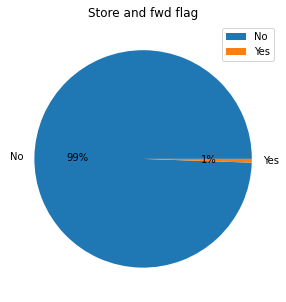

In [37]:
plt.figure(figsize=(5,5))
labels = ['No','Yes']
plt.pie(df['store_and_fwd_flag'].value_counts(),labels=labels, autopct = '%0.0f%%')
plt.legend()
plt.title('Store and fwd flag')
plt.show()

* **There were only 1% of trips for which data was stored in vehicle's memory. This indicates trips were mostly in areas where network connection was good**

In [37]:
# pip install haversine

In [95]:
# from haversine import haversine
# df['distance (km)'] = df.apply(lambda x: haversine((x['pickup_latitude'], x['pickup_longitude']), (x['dropoff_latitude'],x['dropoff_longitude'])), axis=1)

In [99]:
# # df.head()
# df.drop(['distance','distance (km)'],axis=1,inplace=True)

In [103]:
# df.rename(columns={'distance_in_km)':'distance_in_km'},inplace=True)

In [38]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day_name,dropoff_day_name,pickup_month,dropoff_month,pickup_day,dropoff_day,distance_in_km,day_type,day_type_dropoff
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,February,February,29,29,1.199074,week day,week day
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,March,March,11,11,4.129117,week day,week day
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,February,February,21,21,7.250763,weekend,weekend
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,January,January,5,5,2.361101,week day,week day
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,February,February,17,17,4.328540,week day,week day


### Variable - distance_in_km

In [39]:
df['distance_in_km'].describe()

count    729322.000000
mean          3.441143
std           4.353138
min           0.000000
25%           1.232697
50%           2.095675
75%           3.876486
max        1240.910391
Name: distance_in_km, dtype: float64

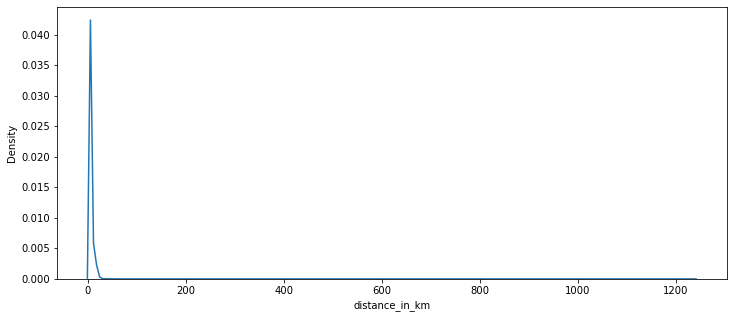

In [40]:
plt.figure(figsize=(12,5))
sns.kdeplot(df['distance_in_km'])
plt.show()

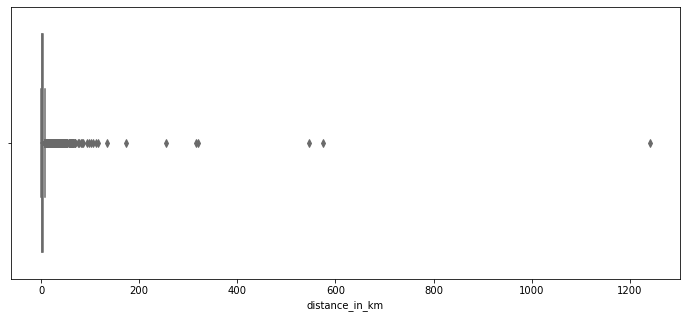

In [41]:
plt.figure(figsize=(12,5))
sns.boxplot(data = df, x = df['distance_in_km'], palette='Set3')
plt.show()

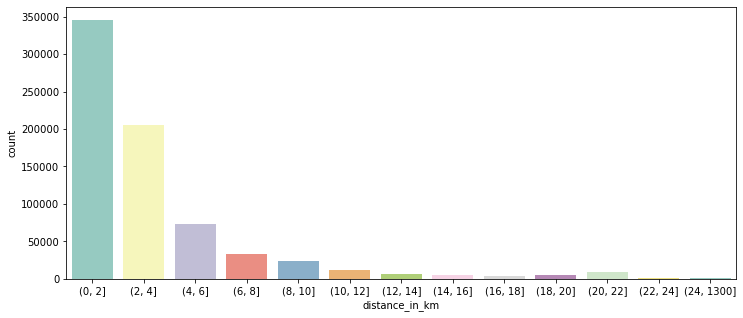

In [42]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x=pd.cut(df['distance_in_km'],[0,2,4,6,8,10,12,14,16,18,20,22,24,1300]), palette='Set3')
plt.show()

* **Distance value lie between 0 km - 1240 km**
* **Avergae distance travelled in a trip is 3.4 kms**
* **50% of distance value lie below 2 kms and 75% lie below 3.8 kms**
* **There are outliers in data which corresponds to long trips, also there are some trips with 0 distance**
* **There are more short than long trips so, people are preferring taxis for a shorter distance as compared to long trip, this could be because of fare or a different mode of transportation is used for longer distance.**

### Variable - trip_duration

In [43]:
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [44]:
df['trip_duration'] = df['trip_duration'].apply(lambda x: x/60)

In [45]:
df['trip_duration'].describe()

count    729322.000000
mean         15.870486
std          64.410437
min           0.016667
25%           6.616667
50%          11.050000
75%          17.916667
max       32328.933333
Name: trip_duration, dtype: float64

* **Average trip duration is around 15-16 mins with minimum value of 1 second and maximum value of 538 hours**
* **50% values are less than 11 mins and 25% values are less than 6 mins**

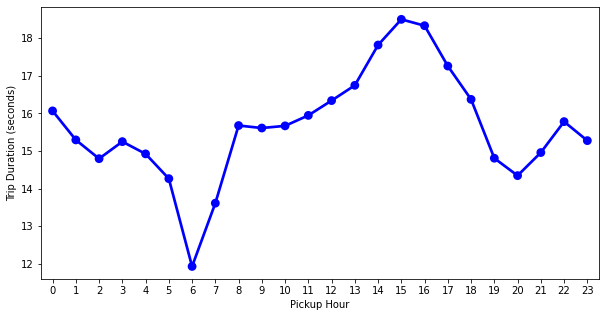

In [46]:
plt.figure(figsize=(10,5))
group1 = df.groupby('pickup_hour').trip_duration.mean()
sns.pointplot(x=group1.index, y=group1.values, color='blue')
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup Hour')
plt.show()

* **Average trip duration is maximum between 3pm-5pm i.e afternoon time and lowest in the morning 6 am**
* **Average trip duration increases in the morning after 6 am till 9 am and then flattens that could be because people usually go to office at that time**

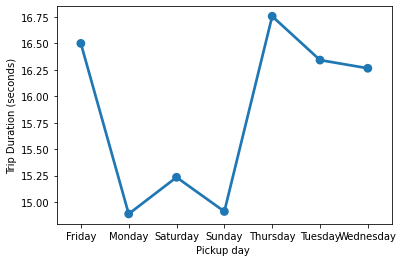

In [47]:
group2 = df.groupby('pickup_day_name').trip_duration.mean()
sns.pointplot(x = group2.index, y = group2.values)
plt.ylabel('Trip Duration (seconds)')
plt.xlabel('Pickup day ')
plt.show()

* **Average trip duration is maximum around thursday and friday and lowest on Moday and Sunday**

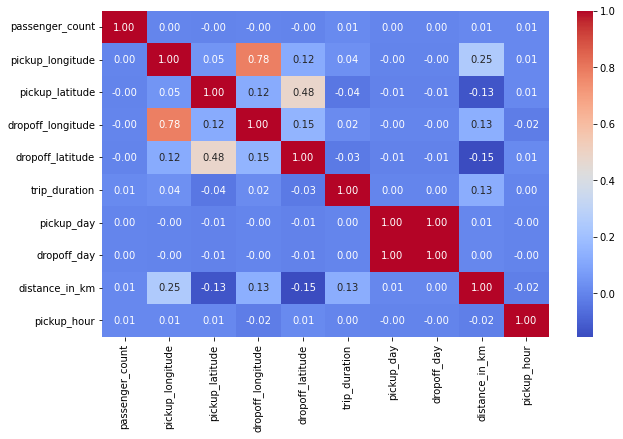

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),fmt='.2f', annot=True, cmap='coolwarm')
plt.show()

* **There is a +ve correlation between distance and trip duration**